As we have extracted pages from the survey report dumped in a pickle file before. Now, we will be using that pickle dumped file to read the data 

In [2]:
class Extracted_Page:
    def __init__(self, name):
        self.name = name
        self.text = ''
        self.tables = []
        self.Images = []

In [3]:
class Table_in_report:
    def __init__(self, name):
        self.name = name
        self.page_number = -1
        self.data_frame = []

In [4]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation .'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [9]:
def clean_text_round2(text): 
    header = '^xyz.*\n'
    footer1 = '^document.*\n'
    footer2 = '^page.*\n'
    unwanted_line = '^confidential.*\n'
    lines_to_remove = [header, footer1, footer2, unwanted_line]
    text1 = text

    for line in lines_to_remove:
        text1 = re.sub(line, '', text1, re.IGNORECASE, re.MULTILINE) 
        
    return text1

round2 = lambda x: clean_text_round2(x)

#### Implementing Natural Language Processing(NLP) Steps for the data in text.

Tagging and Lemmatization

In [6]:
import pickle
with open('extracted_Pages.pickle', 'rb') as handle:
    extracted_Pages = pickle.load(handle)

In [60]:
data_of_interest =['cp value','cp potential','cp stab potential','field gradient','anode consumption']


In [152]:
page_text = extracted_Pages['page_11'].text
page_text_lower = page_text.lower()

In [166]:
text_for_analysis = ''
for page_no, page in enumerate(extracted_Pages, start=1):
    if page_no >=13:
        temp_text = round1(extracted_Pages[page].text)
        text_for_analysis += round2(temp_text)

In [111]:
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
stop_words = set(stopwords.words('english')) 

In [200]:
#[print(line) for line in text_to_explore.splitlines()]

#### Creating Wordcloud

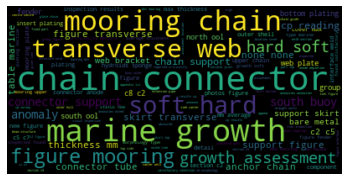

In [167]:

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import wordcloud
wordcloud = WordCloud().generate(text_for_analysis)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wc= plt.show()

#### Speech tagging and parsing for the survey data

In [340]:
text_to_explore = extracted_Pages['page_173'].text

In [341]:
text_to_explore=round2(text_to_explore.lower())

In [481]:
class information_explorer:
    def __init__(self ,string):
        self.string = string
        self.location = None
        self.data_type_qual = None
        self.data_type_quan = None
        self.date = None
        self.qualitative = None
        self.quantitative = None
        self.negative_inducing = False
    def update(self, other_information):
        if other_information.location != None:
            self.location = other_information.location
        if other_information.date !=None:
            self.date = other_information.date

In [242]:
#from nltk.corpus import treebank
#t = treebank.parsed_sents(tagged[0])
#t.draw()
type(tagged[2][1])

str

In [160]:
class Parsed_tagged_text:
    def __init__(self, string, tag):
        self.string = string
        self.tag = tag

In [89]:
#Define your grammar using regular expressions
grammar = r"""
  NP: {<DT|PP\$>?<JJ|CD>*<CD|NN.*>+}   # chunk determiner/possessive, adjectives/integer and nouns
               # chunk sequences of proper nouns
"""
import nltk
chunkParser = nltk.RegexpParser(grammar)

In [215]:
text_to_explore1 = "chain 6 connector tube \n\nanomaly yzh/2015dc/22 confirmed - no chxyze\n\na low cp reading was obtained on the connector tubes.\n\nvalue: -643mv.\n\nthe associated anode is 100% depleted.\n\nthe cp value is currently just in the 'underprotected' rxyze. above -640mv would constitute the 'not protected' rxyze."
text_to_explore2 = " the associated chain connector six tube returned a CP reading as -643mV.\n"

#tagged

In [183]:
def get_string_from_parsed_branch(subtree):
    string =''
    result = Parsed_tagged_text(string, 'none')
    second_last_node = False
    if type(subtree) == string:
        return
    if type(subtree) == tuple:
        return Parsed_tagged_text(subtree[0],subtree[1])
    
    #if node contains only one branch, then change from phrase form to single form again.
    if len(subtree) == 1:
        for branch in subtree:
            return Parsed_tagged_text(branch[0],branch[1])
    for branch in subtree:
        if type(branch) == tuple:
            string = string + branch[0]+' '
        else:
            string = string + get_string_from_parsed_branch(branch)
    result.string = string
    result.tag = 'NP'
    return result

In [172]:
#this function return the list of Parsed_tagged_text after from the given strings.
def get_list_of_parsed_string(texts): 
    tagged1 = nltk.pos_tag(nltk.word_tokenize(texts))    
    tree1 = chunkParser.parse(tagged1)
    parsed_text=[]
    for subtree_count, subtree in enumerate(tree1.subtrees()):
        if subtree_count ==0:
            for parsed in subtree:
                parse_string = get_string_from_parsed_branch(parsed)
                parsed_text.append(parse_string)
    
    return parsed_text

In [190]:
#[print(parse.string, parse.tag) for parse in parsed_text if parse.tag == 'NP']

In [487]:
nltk.pos_tag(nltk.word_tokenize('not'))

[('not', 'RB')]

In [225]:
[print(a.string, a.tag) for a in get_list_of_parsed_string1(text_to_explore2)]

the DT
associated VBN
chain connector six tube  NP
returned VBD
a CP reading  NP
as IN
-643mV NN
. .


[None, None, None, None, None, None, None, None]

In [342]:
parsed_text_from_lines =[]
for line in text_to_explore.splitlines():
    if line =='':
        continue
    clean_line = re.sub('[^a-zA-Z0-9-%]+', ' ', line)
    list_temp = get_list_of_parsed_string(clean_line)
    parsed_text_from_lines.append(list_temp)

In [440]:
[[print(parse.string, parse.tag) for parse in line_parsed] for line_parsed in parsed_text_from_lines]

5 CD
xyz NN
south buoy  NP
mooring VBG
line 7  NP
buoy chain connector  NP
yzh 2018 south buoy  NP
uwild JJ
312 CD
report NN
no DT
yzh $
2018oi3 CD
installation yzh  NP
substructure bml7  NP
component moor-chconn  NP
baseline NN
drawing VBG
reference NN
workpack NN
master anomaly  NP
media references  NP
online grabs  NP
3 CD
online clips  NP
0 CD
0 CD
other JJ
anomaly NN
aw NN
date NN
reported VBD
criticality NN
details NNS
anode wastage  NP
20 06 2018  NP
high JJ
chain 7 connector tube anode  NP
new JJ
the anode  NP
located VBN
on IN
the inboard side chain 7 connector tube  NP
is VBZ
100 %  NP
depleted VBD
a contact cp reading  NP
of IN
-659mv NNP
was VBD
obtained VBN
anomaly NN
cp NN
criticality NN
details NNS
cp anomaly  NP
high JJ
chain 7 connector tube  NP
new JJ
a low cp reading  NP
was VBD
obtained VBN
on IN
the connector tube  NP
value -659mv  NP
the associated anode  NP
is VBZ
100 %  NP
depleted VBD
the cp value  NP
is VBZ
currently RB
in IN
the underprotected rxyze  NP
above

[[None],
 [None],
 [None, None, None],
 [None],
 [None, None],
 [None],
 [None, None, None, None],
 [None],
 [None],
 [None],
 [None, None, None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None, None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None, None, None, None, None, None, None],
 [None, None, None, None, None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None, None, None, None, None],
 [None],
 [None, None, None, None],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None, None, None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None, None, None, None, None, None, None, None, None, None],
 [None],
 [None, None, None],
 [None, None, None, None, None, None]]

#### Initiate a exploratory tool which has not been assigned with any object/values for its parameters(Class-object) 

In [335]:
#given the 2 different list of strings, find out if they have matching
def matching_considered(strings1, strings2):
    if len(strings1) < len(strings2):
        least_word_string = strings1 
        most_word_string = strings2
    else:
        least_word_string = strings2
        most_word_string = strings1
    
    least_length = len(least_word_string)
    if least_length <= 3:
        total_matching_needed = least_length
    elif least_length < 4:
        total_matching_needed = least_length-1
    else:
        total_matching_needed = least_length-2
    total_match = 0
    for str1 in least_word_string:   
        for str2 in most_word_string:
            if len(str1) < len(str2):
                st_s = str1
                st_l = str2
            else:
                st_s = str2
                st_l = str1
            if not st_s.isnumeric() and len(st_s) >=3: 
                if len(st_s) >= 4:
                    st_s = st_s[:-1]
                if st_l.startswith(st_s):
                    total_match +=1
                    #print('Matching found')
                    #print(st_s)
                    #print('long_string', st_l)
                    break
            else:
                if st_l == st_s:
                    total_match +=1
                    #print('Matching found')
                    #print(st_s)
                    #print('long_string', st_l)
                    break
    #print(total_match, total_matching_needed )       
    if total_match >= total_matching_needed:
        return True
    return False

In [400]:
def check_if_carries_location_information(string1,locations_list):
    result = None
    words_to_check = round2(string1).split()
    for location_string in locations_list:
        words_for_matching = round2(location_string).split()
        if matching_considered(words_to_check, words_for_matching):
            #print('string from parsed text:',string1)
            #print(location_string)
            result = location_string
    return result

In [432]:
def check_if_percentage_information(string):
    words_to_check = string.split()
    if all(word == '%' or word.isnumeric() for word in words_to_check) and any(word == '%' for word in words_to_check):
        return string
    return None

In [412]:
from dateutil.parser import parse

def check_if_carries_date_information(string, fuzzy=False):
    try: 
        parse(string, fuzzy=fuzzy)
        return True

    except ValueError:
        return False

In [410]:
#matching_considered('my name is madhu'.split(), 'my nam Ramesh not'.split())

In [489]:
quality_describing_words = ['good', 'bad', 'critical', 'satisfactory']
negative_directional_words = ['no', 'not', 'negative']

In [348]:
check_if_carries_location_information('the anode',Location_available)

In [490]:
extracted_information = []
# initiated a space string to the information carrier
temp_information_carrier = information_explorer('')

#explore all the parsed words 
for parsed_line in parsed_text_from_lines:
    init_location_information = temp_information_carrier.location
    
    #initiate new information explorer for every new_line
    information_to_be_extracted = information_explorer('')
    for parse_word in parsed_line:
        if parse_word.tag == 'NP':
            #check if the parsed_word carries information about location
            best_matching_location = check_if_carries_location_information(parse_word.string, Location_available)
            if best_matching_location != None:
                #if the information is carried, then temp_information_carrier is 
                information_to_be_extracted.location = best_matching_location
                continue
                
            #look for something else in the 'NP' like qualitative data 
            elif check_if_carries_date_information(parse_word.string):
                information_to_be_extracted.date = parse_word.string
                continue
                
            elif check_if_percentage_information(parse_word.string) != None:
                information_to_be_extracted.qualitative = parse_word.string
                continue
                
        elif parse_word.tag == 'CD':
            information_to_be_extracted.data_type = parse_word.string
            continue
            
        elif parse_word.tag == 'NNP':
            if re.search(r'[0-9]', parse_word.string) != None:
                #clean it from the alpha charecter and save it as 
                information_to_be_extracted.quantitative = re.sub(r'[^0-9-]', '',parse_word.string)
                #print(information_to_be_extracted.quantitative)
                information_to_be_extracted.data_type_quan = re.sub(r'[0-9-]', '',parse_word.string)
            
        elif parse_word.tag == 'VBN' or parse_word.tag == 'VBD':
            information_to_be_extracted.data_type_qual = parse_word.string
        
        #adjective word with qualitative data
        elif parse_word.tag.startswith('JJ'):
            if any(word == parse_word.string for word in quality_describing_words):
                information_to_be_extracted.qualitative = parse_word.string
        
        elif  parse_word.tag == 'DT' or parse_word.tag == 'RB':
            if any(word == parse_word.string for word in negative_directional_words):
                 information_to_be_extracted.negative_inducing = True
        
    
    #check if new qualitative or quantitative information is obtained            
    if information_to_be_extracted.quantitative != None or information_to_be_extracted.qualitative != None:
        if information_to_be_extracted.quantitative != None and information_to_be_extracted.qualitative != None:
            dup_information = information_to_be_extracted
            dup_information.quantitative = None
            dup_information.data_type.quan = None
            extracted_information.append(dup_information)
            information_to_be_extracted.qualitative = None
            information_to_be_extracted.data_type.qual = None            
        
        information_to_be_extracted.update(temp_information_carrier)
        
        extracted_information.append(information_to_be_extracted)
    
    temp_information_carrier.update(information_to_be_extracted)


In [491]:
for information in extracted_information:
    print(information.quantitative)
    temp = vars(information)
    for item in temp:
        print(item , ' : ' , temp[item])

None
string  :  
location  :  Anchor chain connector support –
Skirt
transverse web backing bkt Mooring 7 U Block 2
data_type_qual  :  depleted
data_type_quan  :  None
date  :  20 06 2018 
qualitative  :  100 % 
quantitative  :  None
negative_inducing  :  False
-659
string  :  
location  :  Anchor chain connector support –
Skirt
transverse web backing bkt Mooring 7 U Block 2
data_type_qual  :  obtained
data_type_quan  :  mv
date  :  20 06 2018 
qualitative  :  None
quantitative  :  -659
negative_inducing  :  False
None
string  :  
location  :  Anchor chain connector support –
Skirt
transverse web backing bkt Mooring 7 U Block 2
data_type_qual  :  depleted
data_type_quan  :  None
date  :  20 06 2018 
qualitative  :  100 % 
quantitative  :  None
negative_inducing  :  False
-640
string  :  
location  :  Anchor chain connector support –
Skirt
transverse web backing bkt Mooring 7 U Block 2
data_type_qual  :  protected
data_type_quan  :  mv
date  :  20 06 2018 
qualitative  :  None
quantitat

<generator object Tree.subtrees at 0x000000001D86E648>

##### Ontology creation

In [137]:
Important_Parameters = ['equipment description','location','zoneid','date','data analysis year','location comment','measurement comment','part number']

In [471]:
result

'abcfg'

In [470]:
result = re.sub(r'[0-9-]', '','-98abcfg')

In [291]:
#nltk.tag.pos_tag(['my man'])[0][0]

False

In [212]:
import re
print(bool(re.match('^(?=.*[0-9]$)(?=.*[a-zA-Z])', '123hasAlphanum')))
print(bool(re.match('^(?=.*[0-9])(?=.*[a-zA-Z]$)', 'some string')))

False
False


In [8]:
qualitative_comments = ['satisfactory','good' ]

In [23]:
plt.show()

[]

#### Data Extraction from the Tabular data available

In [169]:
#removing the  dataframes which are empty

for page in extracted_Pages:
    ini_tables_list = extracted_Pages[page].tables
    
    new_tables_list = []
    for table in ini_tables_list:
        d_f = table.data_frame
        if d_f.empty:
            continue
        d_f = d_f.replace(r'', np.NaN)
        d_f = d_f.dropna()
        if not d_f.empty:
            new_tables_list.append(table)
            
    if len(ini_tables_list) != len(new_tables_list):
        new_page = Extracted_Page(page)
        new_page.text = extracted_Pages[page].text
        new_page.tables = new_tables_list
        
        extracted_Pages[page] = new_page

In [222]:
location_finding_strings = ['equipment description']
Location_available = []
for page in extracted_Pages:
    for table in extracted_Pages[page].tables:
        df = table.data_frame
        #adding all the terms to the list related to the location finding strings
        [Location_available.extend(df[name].tolist()) for name in df.columns for s in location_finding_strings if
         name.lower().startswith(s)]


In [281]:
#Location_available

In [65]:
tables_with_CP_readings = []
for page in extracted_Pages:
    for table in extracted_Pages[page].tables:
        for column in table.data_frame.columns:
            if any(column.lower().startswith(data) for data in data_of_interest):
                tables_with_CP_readings.append(table)
                continue

In [67]:
#[print(df.name, df.data_frame.shape, df.page_number) for df in tables_with_CP_readings]

 south buoy steel cp readings  
 (4, 4) 41
 north ool cp reading  
 (1, 2) 94
 south ool cp reading 
 (1, 2) 100
 cp survey: upper chains  
 (7, 3) 117
No_name (8, 3) 147


[None, None, None, None, None]

In [70]:
#[print(key, len(extracted_Pages[key].tables)) for key in extracted_Pages]

In [105]:
import pandas as pd
temp_df= extracted_Pages['page_147'].tables[0].data_frame

In [106]:
import numpy as np
temp_df = temp_df.replace(r'', np.NaN)
temp_df =temp_df.dropna()

In [201]:
df = extracted_Pages['page_147'].tables[0].data_frame

-957.0
-957.0
-869.0


In [178]:
class Reading_value:
    def __init__(self, value):
        self.value = value
        self.location = ''
        self.unit = ''
        self.date = ''
        self.equipment_description = ''
    

In [ ]:
def 

In [182]:
unwanted_words_in_title = ['readings','reading', 'cp', 'survey', ':']
readings_with_location = []
for CP_reading_table in tables_with_CP_readings:
    d_f = CP_reading_table.data_frame 
    
    #print(d_f.shape)
    location_name = CP_reading_table.name
    if location_name == 'No_name':
        location_name = ''
    for s in unwanted_words_in_title:
        location_name = location_name.replace(s,'')
    
    size_of_columns = len(d_f.columns)
    #print(d_f.columns)
    for first_loop_col_idx, column in enumerate(d_f.columns):   
        if any(column.lower().startswith(data) for data in data_of_interest):
            #print(column.lower())
            for i in range(len(d_f.index)):
                data_value = d_f.iloc[i, first_loop_col_idx]
                
                #if not isinstance(data_value, str) :
                try:
                    float(data_value)
                except ValueError:
                    continue

                new_value = Reading_value(data_value)
                new_value.unit = column
                #print(data_value)
                    
                    #explore all the data in the same row
                for new_col_idx in range(size_of_columns):
                    if new_col_idx != first_loop_col_idx: #explore all except the previous one
                        secondary_data = d_f.iloc[i, new_col_idx]
                        if not isinstance(secondary_data, str) and d_f.columns[new_col_idx] == column:
                            continue
                            
                            #if any(st == d_f.columns[new_col_idx] for st in Important_parameters):
                        if d_f.columns[new_col_idx].lower() == 'location':
                            new_value.location = secondary_data
                            
                        if d_f.columns[new_col_idx].lower() == 'equipment description' :
                            new_value.equipment_description = secondary_data
                        
                        new_value.equipment_description = location_name +''+ new_value.equipment_description       
                readings_with_location.append(new_value)

In [183]:
[print(a.value,',', a.location,',', a.equipment_description) for a in readings_with_location]

-1070 , 0deg ,  south buoy steel    
 south buoy steel    
Buoy Bottom Plating
-1062 , 180deg ,  south buoy steel    
 south buoy steel    
Buoy Bottom Plating
-1082 , 0deg ,  south buoy steel    
 south buoy steel    
Buoy Outer Shell Plating
-1077 , 180deg ,  south buoy steel    
 south buoy steel    
Buoy Outer Shell Plating
-1084 , Flex-Joint Body ,  north ool    

-1085 , Flex-Joint Body ,  south ool   

-948 ,  ,    upper chains  
Mooring Chain 1 - Link 5
-948 ,  ,    upper chains  
Mooring Chain 2 - Link 5
-940 ,  ,    upper chains  
Mooring Chain 3 - Link 5
-865 ,  ,    upper chains  
Mooring Chain 4 - Link 5
-668 ,  ,    upper chains  
Mooring Chain 5 - Link 5
-664 ,  ,    upper chains  
Mooring Chain 6 - Link 5
-668 ,  ,    upper chains  
Mooring Chain 7 - Link 5
-957 ,  , Chain 1 Connector Tube
-957 ,  , Chain 3 Connector Tube
-869 ,  , Chain 4 Connector Tube
-870 ,  , Chain 4 Connector Tube
-663 ,  , Chain 5 Connector Tube
-643 ,  , Chain 6 Connector Tube
-659 ,  , Chain 7 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]